# Exploratory Data Analysis on Car Dataset

This project performs a comprehensive Exploratory Data Analysis (EDA) on a car dataset.  
The goal is to understand the structure of the data, detect patterns, visualize distributions, and identify potential insights that can be used for further analysis or modeling.

---


## 1. Importing Required Libraries

We begin by importing the necessary Python libraries such as:
- pandas and numpy for data manipulation,
- matplotlib.pyplot and seaborn for visualizations.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline
%matplotlib inline

## 2. Loading the Dataset

We load the dataset from a CSV file using pandas. After loading, we preview the first few rows using df.head() to understand the format.

In [33]:
df = pd.read_csv("dataset eda.csv")  # Make sure the file is in the same directory
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## 3. Basic Information and Overview

We explore:
- Shape (rows x columns)
- Column names and data types
- Summary statistics using describe()
- Count of missing values in each column

This step gives us a general understanding of what kind of data we are working with.

In [34]:
print("Shape of the dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe(include='all'))

Shape of the dataset: (4991, 16)

Column names: ['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'odometer', 'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate']

Data Types:
 year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

Missing values:
 year              0
make             19
model            20
trim             34
body            132
transmission    285
vin               0
state             0
condition       556
odometer          5
color            14
interior         14
seller            0
mmr               0
sellingprice      0
saledate          0
dtype: int64

Statistical Summary:
  

## 4. Handling Missing Values

We either drop or fill missing data to prepare it for analysis.

In [35]:
# Optional: Drop rows with any nulls or fill them
df_cleaned = df.dropna()  # or use df.fillna(method='ffill') to forward fill

## 5. Analyzing Categorical Features

This block shows value counts for all categorical (object-type) columns.

In [36]:
for col in df.select_dtypes(include='object'):
    print(f"\nUnique values in '{col}':\n", df[col].value_counts())


Unique values in 'make':
 make
Ford         509
Nissan       486
BMW          473
Infiniti     396
Chevrolet    356
            ... 
gmc truck      1
Maserati       1
pontiac        1
lincoln        1
hyundai        1
Name: count, Length: 65, dtype: int64

Unique values in 'model':
 model
G Sedan       247
3 Series      205
Altima        167
Accord         89
5 Series       82
             ... 
lancer          1
Verano          1
ELR             1
Versa Note      1
camry           1
Name: count, Length: 479, dtype: int64

Unique values in 'trim':
 trim
Base               607
SE                 218
G37 Journey        182
LX                 162
328i               128
                  ... 
Cargo                1
Overland             1
Premium quattro      1
sport s/c            1
v6 le                1
Name: count, Length: 568, dtype: int64

Unique values in 'body':
 body
Sedan              2093
SUV                1054
Hatchback           288
G Sedan             247
Convertible         

## 6. Countplot for Car Body Types

A countplot to visualize the frequency of each body type in the dataset.

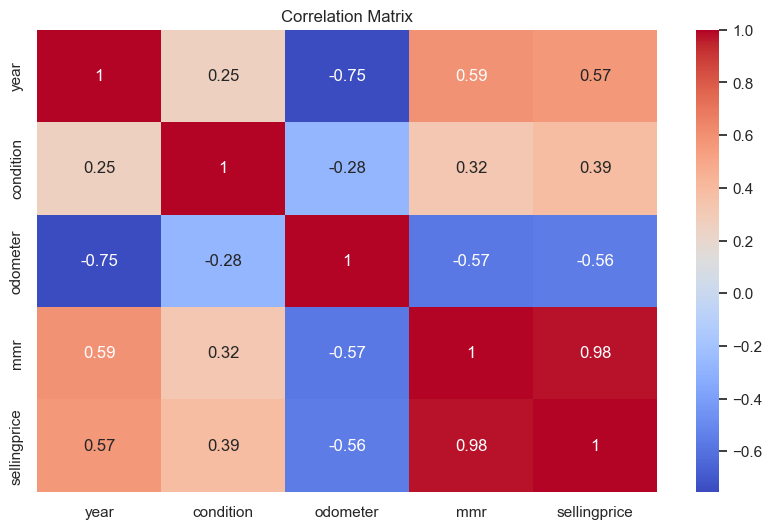

In [37]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 7. Pairplot of Numerical Columns

This pairplot is generated using Seaborn to visually explore relationships between all numerical features.
It shows scatterplots and distributions for each pair of variables, helping us detect correlations and trends in the dataset.

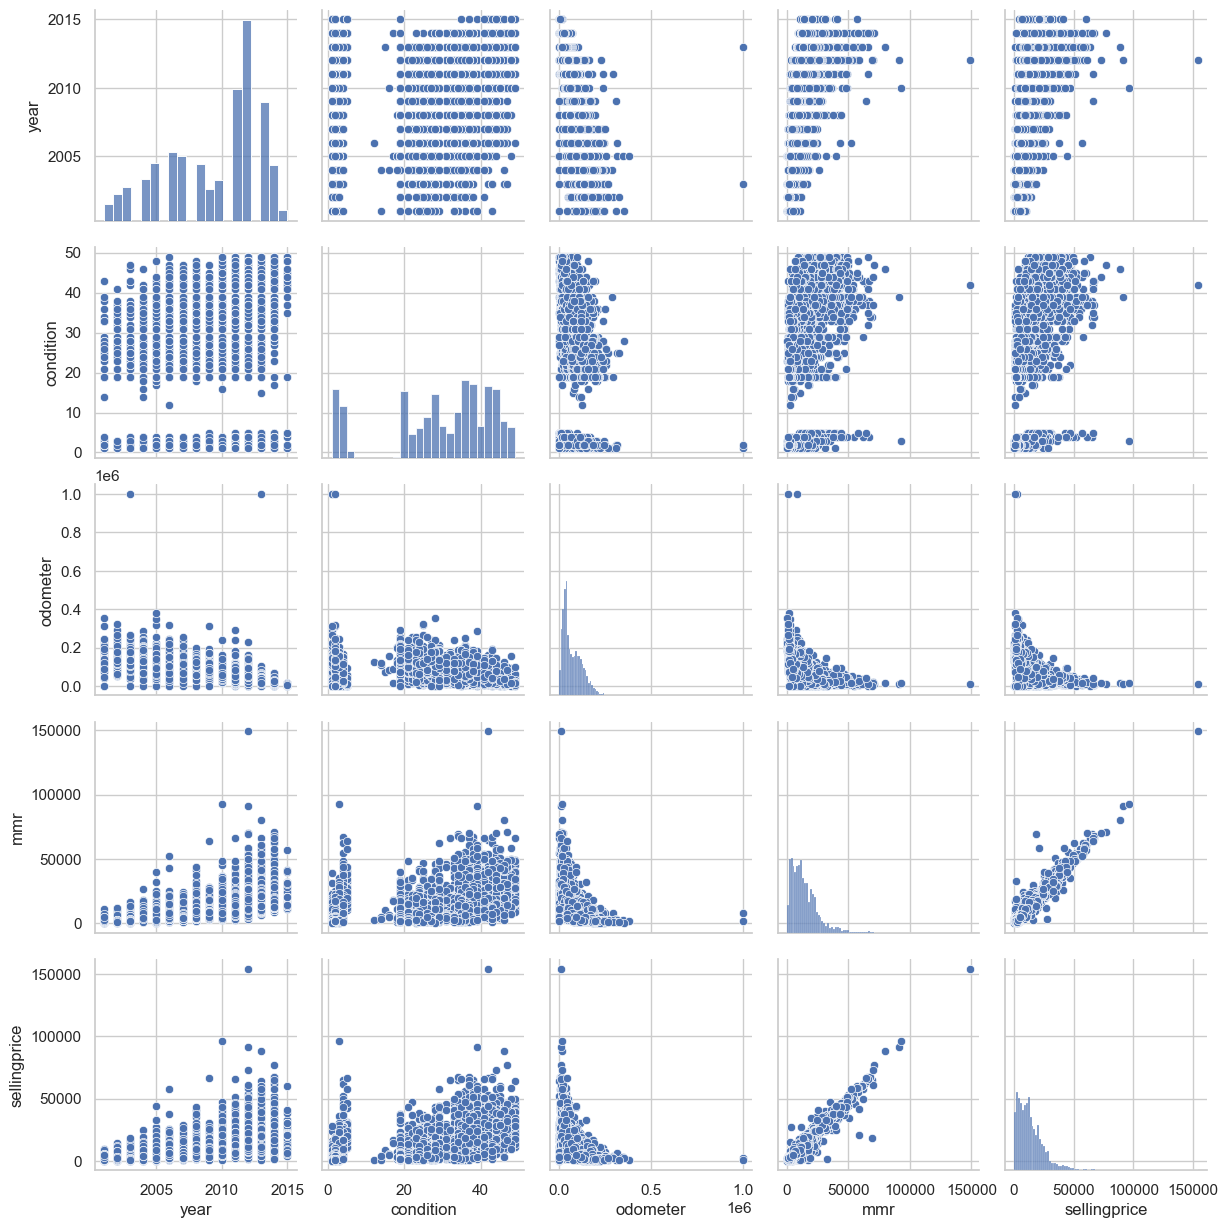

In [38]:
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

## 8. Correlation Matrix

This heatmap shows relationships (correlations) between numerical features.

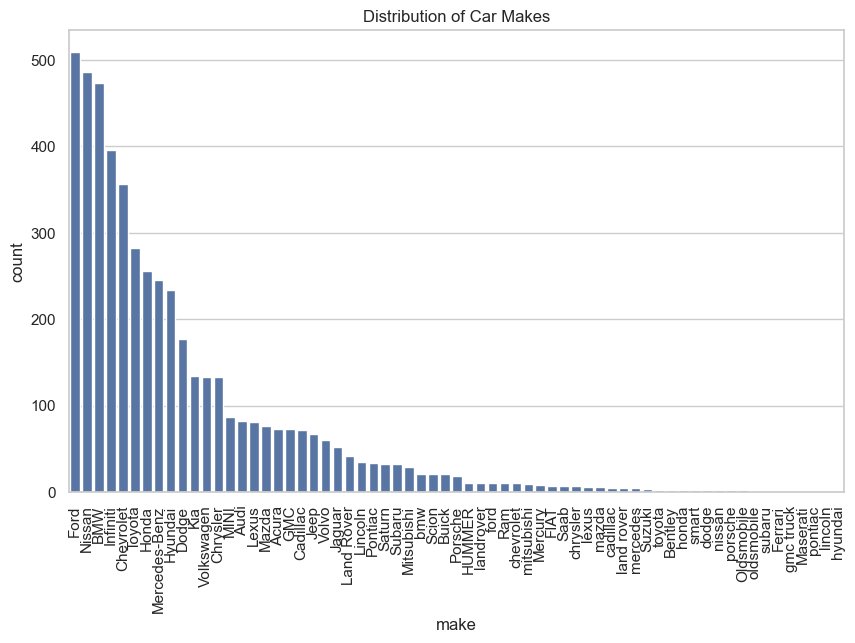

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(x='make', data=df, order=df['make'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Car Makes")
plt.show()

## 9. Boxplot of Price by Year

This boxplot displays the distribution of car selling prices over the years. It helps detect how price varies with the manufacturing year and reveals any outliers in pricing.

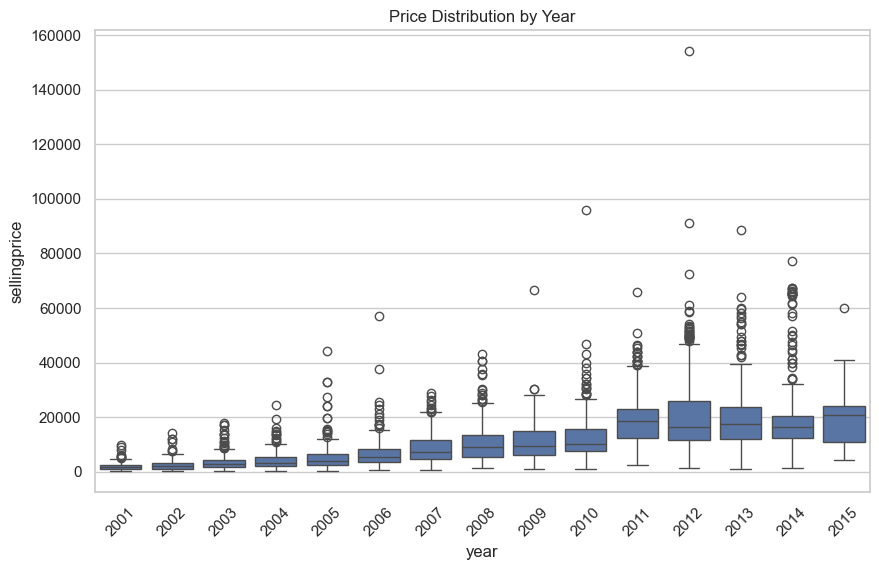

In [40]:
if 'year' in df.columns and 'sellingprice' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='year', y='sellingprice', data=df)
    plt.title("Price Distribution by Year")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Required columns 'year' and 'sellingprice' are not in the dataframe.")

### 📌 Machine Learning Model Training & Testing

In this section, we apply *four different regression models* to predict the target variable sellingprice. The models used are:

1. *Linear Regression*
2. *Decision Tree Regressor*
3. *Random Forest Regressor*
4. *Support Vector Regressor (SVR)*


#### 🔧 Steps Followed:

- *🧹 Data Preprocessing*
  - Categorical columns are encoded using LabelEncoder.
  - All features are scaled using StandardScaler for better model performance.

- *✂ Train/Test Split*
  - The dataset is split into 80% training and 20% testing using train_test_split.

- *📊 Model Training & Evaluation*
  - Each model is trained and evaluated using:
    - Mean Squared Error (MSE)
    - R² Score

- *📈 Visualization*
  - A scatter plot of *Actual vs Predicted selling prices* is shown for each model to assess performance visually.



📊 Linear Regression
MSE: 3704492.58
R² Score: 0.98


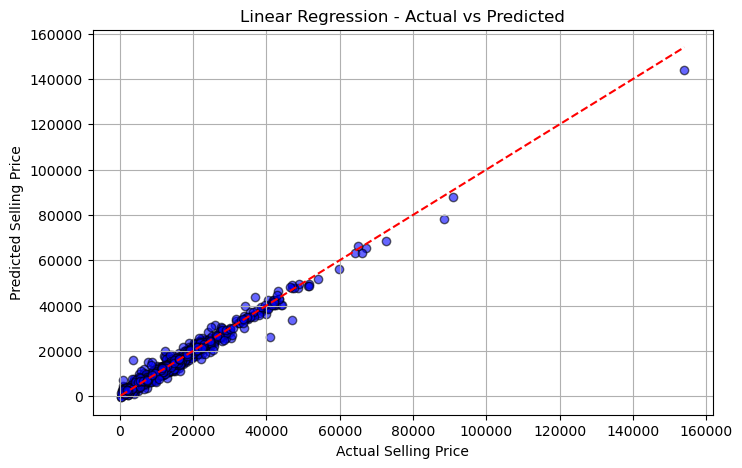


📊 Decision Tree Regressor
MSE: 14057160.37
R² Score: 0.91


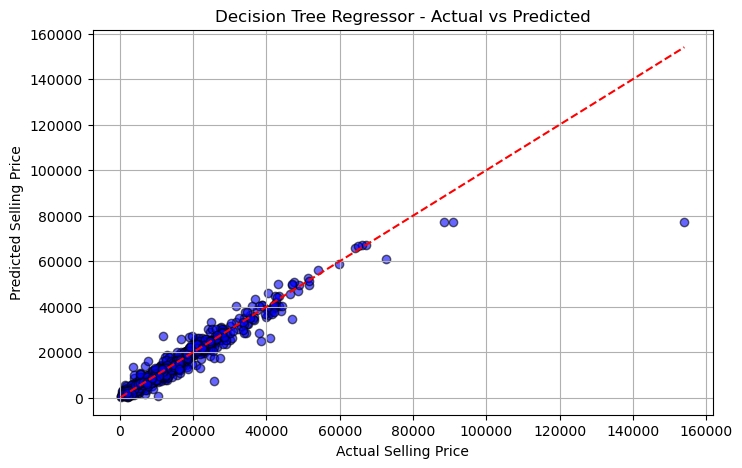


📊 Random Forest Regressor
MSE: 11192252.18
R² Score: 0.93


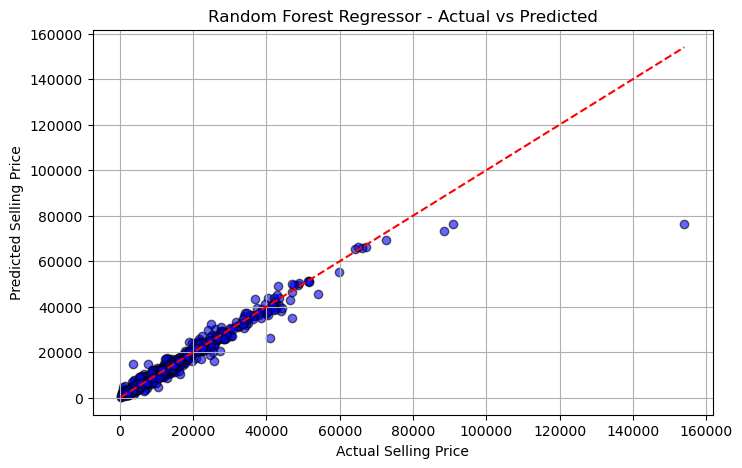


📊 Support Vector Regressor (SVM)
MSE: 166947645.76
R² Score: -0.04


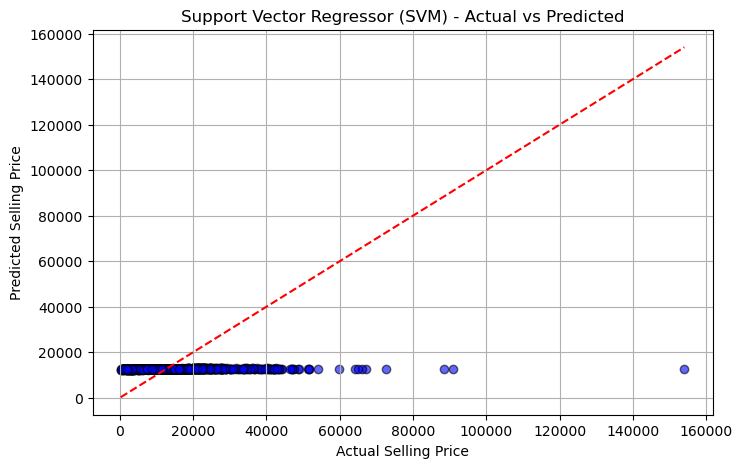

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("dataset eda.csv")
df = df.dropna()  # Drop missing values

# Set target and features
target = 'sellingprice'
X = df.drop(columns=[target])
y = df[target]

# Encode categorical features
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include='object'):
    X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Scale numeric values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Evaluation + Visualization function
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print(f"\n📊 {name}")
    print("MSE:", round(mse, 2))
    print("R² Score:", round(r2, 2))

    # Visualize Actual vs Predicted
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, preds, alpha=0.6, color='blue', edgecolors='k')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
    plt.xlabel("Actual Selling Price")
    plt.ylabel("Predicted Selling Price")
    plt.title(f"{name} - Actual vs Predicted")
    plt.grid(True)
    plt.show()

# Train and test 4 ML models
evaluate_model(LinearRegression(), "Linear Regression")
evaluate_model(DecisionTreeRegressor(random_state=42), "Decision Tree Regressor")
evaluate_model(RandomForestRegressor(random_state=42), "Random Forest Regressor")
evaluate_model(SVR(), "Support Vector Regressor (SVM)")